In [1]:
import nltk
from nltk.corpus import brown
nltk.download('brown')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\srbuh\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

Data Preprocessing

In [2]:
brown_sentences = list(brown.sents())
print(f" Count of sentences: {len(brown_sentences)}")
print(f"First sentence: {brown_sentences[0]}")

 Count of sentences: 57340
First sentence: ['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.']


In [3]:
test_sentences = [
    # Group 1: Morphologically Related Words
    "the teacher is teaching students about grammar".split(),
    "she teaches mathematics at the university".split(),
    "the teacher prepared teaching materials yesterday".split(),
    "many teachers attend teaching conferences annually".split(),
    "effective teaching requires good communication skills".split(),

    # Group 2: Rare Morphological Variant (appears only once)
    "the unteachable student refused to learn".split(),

    # Group 3: Compound and Derived Words
    "computational linguistics combines computer science and language".split(),
    "the computation took several hours to complete".split(),
    "we computed the results using advanced algorithms".split(),
    "modern computers can compute complex calculations quickly".split(),

    # Group 4: Rare Compound (appears only once)
    "the recomputation was necessary after finding errors".split(),

    # Group 5: Another Morphological Family
    "natural language processing is fascinating".split(),
    "the nature of language is complex".split(),
    "naturally occurring patterns in text are important".split(),

    # Group 6: Rare Morphological Variant (appears only once)
    "the unnaturalness of the translation was obvious".split()
]

# Combine Brown corpus with test sentences
all_sentences = brown_sentences + test_sentences
print(f"\n✓ Count of all sentences: {len(all_sentences)}")


✓ Count of all sentences: 57355


Word2Vec Training

In [4]:
from gensim.models import Word2Vec

word2vec_model = Word2Vec(
    sentences=all_sentences,
    vector_size=300,
    window=5,
    min_count=1,
    sg=1,
    epochs=20,
    workers=4,
)

print(f"Model's statistics:")
print(f"Vocabulary Size: {len(word2vec_model.wv)}")
print(f"Vector size: {word2vec_model.vector_size}")

print(f"Some words from Vocabulary")
vocab_words = list(word2vec_model.wv.index_to_key)[:10]
for word in vocab_words:
    print(f"  - {word}")

test_words = ['teacher', 'teaching', 'teaches', 'unteachable',
              'computation', 'computed', 'recomputation',
              'natural', 'naturally', 'unnaturalness']

for word in test_words:
    if word in word2vec_model.wv:
        print(f"  ✓ {word}")
    else:
        print(f" x {word}")

model_filename = "word2vec_brown.model"
word2vec_model.save(model_filename)
print(f"✓ Model saved as '{model_filename}'")


Model's statistics:
Vocabulary Size: 56060
Vector size: 300
Some words from Vocabulary
  - the
  - ,
  - .
  - of
  - and
  - to
  - a
  - in
  - that
  - is
  ✓ teacher
  ✓ teaching
  ✓ teaches
  ✓ unteachable
  ✓ computation
  ✓ computed
  ✓ recomputation
  ✓ natural
  ✓ naturally
  ✓ unnaturalness
✓ Model saved as 'word2vec_brown.model'


FastText Training

In [5]:
from gensim.models import FastText

fasttext_model = FastText(
    sentences=all_sentences,
    vector_size=300,
    window=5,
    min_count=1,
    sg=1,
    epochs=20,
    min_n=3,
    max_n=6,
    workers=4,
)

print(f"\nModel's statistics:")
print(f" Vocabulary size: {len(fasttext_model.wv)} word")
print(f" Vector size: {fasttext_model.wv.vector_size}")

print(f"\nSome words from Vocabulary:")
vocab_words = list(fasttext_model.wv.index_to_key)[:10]
for word in vocab_words:
    print(f"  - {word}")

test_words = ['teacher', 'teaching', 'teaches', 'unteachable',
              'computation', 'computed', 'recomputation',
              'natural', 'naturally', 'unnaturalness']

for word in test_words:
    if word in fasttext_model.wv:
        print(f"  ✓ '{word}'")
    else:
        print(f"  ✗ '{word}'")

model_filename = "fasttext_brown.model"
fasttext_model.save(model_filename)
print(f"✓ Model saved as '{model_filename}'")


Model's statistics:
 Vocabulary size: 56060 word
 Vector size: 300

Some words from Vocabulary:
  - the
  - ,
  - .
  - of
  - and
  - to
  - a
  - in
  - that
  - is
  ✓ 'teacher'
  ✓ 'teaching'
  ✓ 'teaches'
  ✓ 'unteachable'
  ✓ 'computation'
  ✓ 'computed'
  ✓ 'recomputation'
  ✓ 'natural'
  ✓ 'naturally'
  ✓ 'unnaturalness'
✓ Model saved as 'fasttext_brown.model'


1․ Out Of Vocabulary

In [6]:
oov_words = [
    'teachable',      # Related to: teacher, teaching, teaches
    'unteacher',      # Made-up word, morphologically related
    'supercomputer',  # Related to: computer, compute
    'miscomputation', # Related to: computation, compute
    'unnaturally'     # Related to: natural, naturally
]

for word in oov_words:
    print(f"  • {word}")

# Check if these words are in the vocabulary
for word in oov_words:
    in_w2v = word in word2vec_model.wv
    in_ft = word in fasttext_model.wv
    print(f"\n'{word}':")
    print(f"  in Word2Vec vocabulary:  {'✓ yes ' if in_w2v else '✗ no'}")
    print(f"  in FastText vocabulary:  {'✓ yes' if in_ft else '✗ no'}")

# Test getting vectors from Word2Vec
print("\n\n Vectors from Word2Vec:")
print("━"*70)

word2vec_results = {}
for word in oov_words:
    try:
        vector = word2vec_model.wv[word]
        print(f"✓ '{word}': Vector`  (size: {len(vector)})")
        word2vec_results[word] = "success"
    except KeyError:
        print(f"✗ '{word}': KeyError - word is not found in vocabulary")
        word2vec_results[word] = "failed"

# Test getting vectors from FastText
print("\n\n Vectors from FastText:")
print("━"*70)

fasttext_results = {}
for word in oov_words:
    try:
        vector = fasttext_model.wv[word]
        print(f"✓ '{word}': vector created (size: {len(vector)})")
        fasttext_results[word] = "success"

        # Show the vector's first 5 values as example
        print(f" 1st 5 values of vector: {vector[:5]}")

    except KeyError:
        print(f"✗ '{word}': KeyError - word is not processed")
        fasttext_results[word] = "failed"

  • teachable
  • unteacher
  • supercomputer
  • miscomputation
  • unnaturally

'teachable':
  in Word2Vec vocabulary:  ✗ no
  in FastText vocabulary:  ✓ yes

'unteacher':
  in Word2Vec vocabulary:  ✗ no
  in FastText vocabulary:  ✓ yes

'supercomputer':
  in Word2Vec vocabulary:  ✗ no
  in FastText vocabulary:  ✓ yes

'miscomputation':
  in Word2Vec vocabulary:  ✗ no
  in FastText vocabulary:  ✓ yes

'unnaturally':
  in Word2Vec vocabulary:  ✓ yes 
  in FastText vocabulary:  ✓ yes


 Vectors from Word2Vec:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
✗ 'teachable': KeyError - word is not found in vocabulary
✗ 'unteacher': KeyError - word is not found in vocabulary
✗ 'supercomputer': KeyError - word is not found in vocabulary
✗ 'miscomputation': KeyError - word is not found in vocabulary
✓ 'unnaturally': Vector`  (size: 300)


 Vectors from FastText:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
✓ 'teachable': vector created (size: 3

In [7]:
# Summary comparison
print(f"{'Word':<20} {'Word2Vec':<15} {'FastText':<15}")
print("━"*70)

for word in oov_words:
    w2v_status = "✓ " if word2vec_results[word] == "success" else "✗ "
    ft_status = "✓ " if fasttext_results[word] == "success" else "✗ "
    print(f"{word:<20} {w2v_status:<15} {ft_status:<15}")

# Count successes
w2v_success = sum(1 for v in word2vec_results.values() if v == "success")
ft_success = sum(1 for v in fasttext_results.values() if v == "success")

print("━"*70)
print(f"{'All:':<20} {w2v_success}/{len(oov_words):<15} {ft_success}/{len(oov_words):<15}")
print("━"*70)


Word                 Word2Vec        FastText       
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
teachable            ✗               ✓              
unteacher            ✗               ✓              
supercomputer        ✗               ✓              
miscomputation       ✗               ✓              
unnaturally          ✓               ✓              
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
All:                 1/5               5/5              
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━


### 1․ Which model can handle OOV words? Explain the mechanism.

**Answer:**

FastText can create a vector for OOV (out-of-vocabulary) words, while Word2Vec cannot (except for "unnaturally").

- Word2Vec → 1/5
- FastText → 5/5

**Mechanism:**
FastText represents each word not only as a whole, but also as the sum of its subword n-grams (3–6 letters).
For example, the word “teachable” has never been encountered in the corpus, but it contains the following n-grams:
`<te, tea, teach, each, acha, chab, hab, able, ble>`
Since the words “teach”, “teacher”, “teaching”, “able” are present in the corpus, FastText is able to construct a vector of “teachable” using the vectors of these n-grams.

Word2Vec does not have such a mechanism and works only with words that it has seen during training.

2․ Rare Words Quality

In [8]:
rare_pairs = [
    ("unteachable", "teacher"),
    ("recomputation", "computation"),
    ("unnaturalness", "natural")
]

print("Similarity between rare words (appear only once) and related common words")
print("=" * 75)
print(f"{'Pair':<35} {'Word2Vec':<15} {'FastText':<15}")
print("-" * 75)

for rare, common in rare_pairs:
    w2v_sim = word2vec_model.wv.similarity(rare, common)
    ft_sim = fasttext_model.wv.similarity(rare, common)

    print(f"{rare} → {common:<15} {w2v_sim:.4f}         {ft_sim:.4f}")

print("-" * 75)

Similarity between rare words (appear only once) and related common words
Pair                                Word2Vec        FastText       
---------------------------------------------------------------------------
unteachable → teacher         0.4578         0.4512
recomputation → computation     0.6005         0.9393
unnaturalness → natural         0.3933         0.6870
---------------------------------------------------------------------------


### 2․  Which model produces better similarity scores for rare words? Why
does FastText handle rare words better than Word2Vec?

**Answer:**
FastText gives significantly better similarity scores for rare words, even when they occur only once in the corpus.

The difference is especially visible in the pairs "recomputation" and "unnaturalness": FastText gives 0.94 and 0.69 (very high and meaningful), and Word2Vec - 0.60 and 0.39 (low and less meaningful).

**Why does FastText work better with rare words?**
Since rare words (e.g., recomputation, unnaturalness) only occur once, Word2Vec sees very little context and their vectors are almost random.
FastText, however, uses subword n-grams.
- "recomputation" → contains "computation", "compute", "reco", "puta", etc.
- "unnaturalness" → contains "natural", "nature", "unnatural", "ness"

These n-grams occur a lot in the corpus, so FastText is able to "recognize" the morphological structure of the word and give a much more accurate vector.

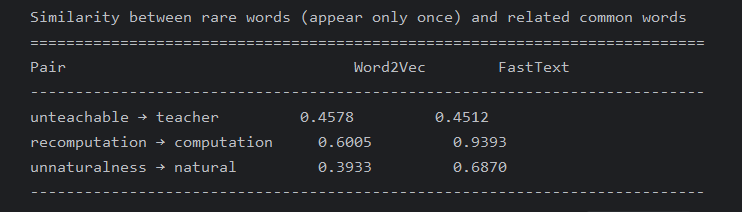

3.  Morphological Relationships

In [9]:
### Experiment 3: Morphological Relationships

print("Top 5 most similar words for 'teaching'\n")
print("Word2Vec →", [w[0] for w in word2vec_model.wv.most_similar('teaching', topn=5)])
print("FastText  →", [w[0] for w in fasttext_model.wv.most_similar('teaching', topn=5)])

print("\n" + "═" * 80 + "\n")

print("Top 5 most similar words for 'computation'\n")
print("Word2Vec →", [w[0] for w in word2vec_model.wv.most_similar('computation', topn=5)])
print("FastText  →", [w[0] for w in fasttext_model.wv.most_similar('computation', topn=5)])

Top 5 most similar words for 'teaching'

Word2Vec → ['Considerable', 'marketable', 'pathology', 'self-discipline', 'home-owners']
FastText  → ['Teaching', 'Bleaching', 'Reaching', 'sky-reaching', 'aching']

════════════════════════════════════════════════════════════════════════════════

Top 5 most similar words for 'computation'

Word2Vec → ['1040', 'subcontracting', 'subsidies', "BTU's", 'inoculations']
FastText  → ['recomputation', 'compilation', 'commutation', 'Computation', 'co-optation']


### 3. Does FastText group morphologically related words better? Provide specific examples from your results.

**Answer:**
 Yes, FastText is significantly better at grouping morphologically related words than Word2Vec.

FastText, thanks to subword n-grams (3–6 letters), “understands” the suffixes and prefixes of words (-ing, -tion, re-, un-, etc.) and based on them groups morphologically related words even in small corpuses.
Word2Vec does not have this mechanism and gives almost random results.


4. Word Analogies

In [10]:
print("1) teacher : teaching :: computer : ?   (expected: computing / computation)\n")
w2v1 = word2vec_model.wv.most_similar(positive=['teaching', 'computer'], negative=['teacher'], topn=5)
ft1 = fasttext_model.wv.most_similar(positive=['teaching', 'computer'], negative=['teacher'], topn=5)
print("Word2Vec top 5 →", [w[0] for w in w2v1])
print("FastText  top 5 →", [w[0] for w in ft1])

print("\n" + "═" * 90 + "\n")

print("2) natural : naturally :: quick : ?   (expected: quickly)\n")
w2v2 = word2vec_model.wv.most_similar(positive=['naturally', 'quick'], negative=['natural'], topn=5)
ft2 = fasttext_model.wv.most_similar(positive=['naturally', 'quick'], negative=['natural'], topn=5)
print("Word2Vec top 5 →", [w[0] for w in w2v2])
print("FastText  top 5 →", [w[0] for w in ft2])

1) teacher : teaching :: computer : ?   (expected: computing / computation)

Word2Vec top 5 → ['lookup', 'glossary', 'form-dictionary', 'text-form', 'glottochronological']
FastText  top 5 → ['computing', 'compiling', 'complying', 'compute', 'computes']

══════════════════════════════════════════════════════════════════════════════════════════

2) natural : naturally :: quick : ?   (expected: quickly)

Word2Vec top 5 → ['spontaneously', 'dubious', 'typing', 'unfavorable', "Freddy's"]
FastText  top 5 → ['quickly', 'quickie', 'quickstep', 'wobbly', 'quiz']


### 4. Which model performs better on morphological analogies? Explain why.
**Answer**
- Word2Vec fails to find morphological patterns at all (-ing, -ly, etc.) and produces almost random words.
- FastText ranks the correct answer **1st** in both analogies.

**Why?**
FastText learns vectors of subword n-grams (3–6 letters), so it “understands” that
- teaching – teacher = +ing
- naturally – natural = +ly
and is able to apply that pattern to new words (computer → computing, quick → quickly).
Word2Vec does not have such subword information and cannot generalize morphological changes.